## <center>Tugas Besar 1 Bagian A</center>
####  <center>Eksplorasi <i>library <strong>Decision Tree Learning</strong></i> pada <i>Jupyter Notebook</i></center>



<center>Oleh : </center>
<center>1. Pandyaka Aptanagi / 13517003</center>
<center>2. I Putu Gede Wirasuta / 13517015</center>
<center>3. M. Rifky I. Bariansyah / 13517081</center>
<center>4. Gardahadi / 13517144</center>

### 1. Melakukan pembelajaran DTL dan Id3Estimator

#### a. Membaca dataset <i>iris</i> dan dataset <i>play-tennis</i>

In [8]:
# Importing some utils
from sklearn import tree, preprocessing
import matplotlib.pyplot as plt

from id3 import Id3Estimator
from id3 import export_graphviz
from id3 import export_text as export_text_id3

# Import load_iris untuk mendapatkan fungsi load dataset iris
from sklearn.datasets import load_iris

# Import pandas untuk membaca file csv berisi dataset play-tennis
import pandas as pd

In [9]:
# Membaca dataset iris dari load_iris
iris_data = load_iris()

# Membaca dataset play-tennis dari file csv
playtennis_dataframe = pd.read_csv("play_tennis.csv")

##### b. Melakukan pembelajaran <i>Decision Tree Learning</i> dengan <i>Decision Tree Classifier</i> dan <i>Id3Estimator</i>

<strong>Dataset Iris</strong>

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



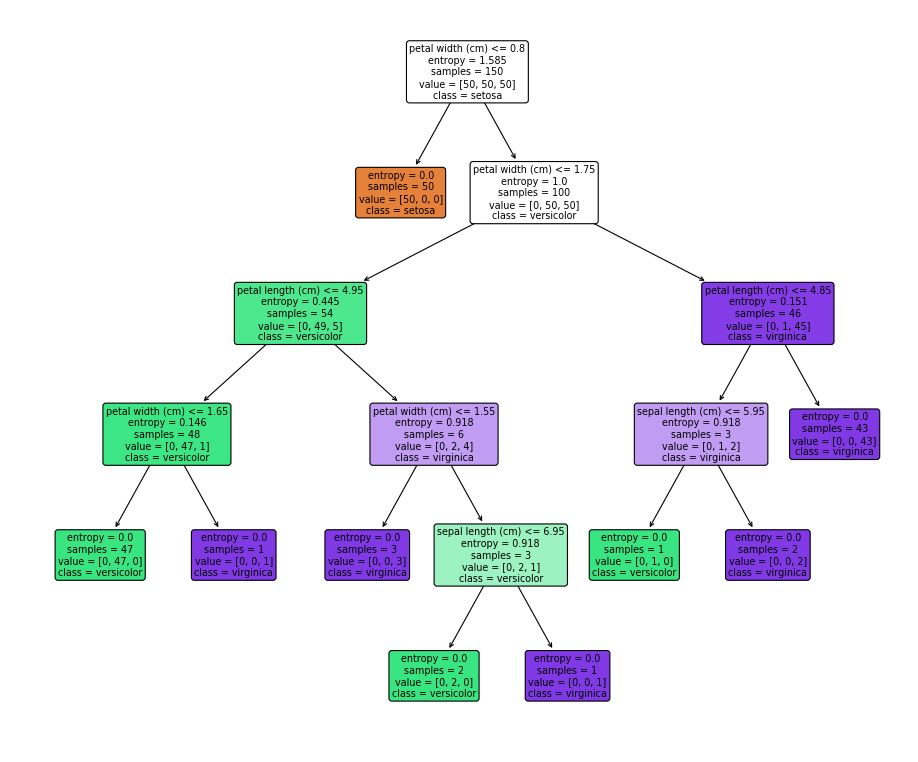

In [10]:
## Decision Tree Classifier
dtl_iris = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
dtl_iris = dtl_iris.fit(iris_data.data, iris_data.target)

### Menampilkan model pohon dengan export_text 
print(tree.export_text(dtl_iris, feature_names=iris_data['feature_names']))

### Menampilkan model pohon dengan plot_tree
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(dtl_iris, filled=True, rounded=True, class_names=iris_data.target_names, feature_names=iris_data.feature_names)
plt.show()

In [11]:
## Id3Estimator
id3_iris = Id3Estimator()
id3_iris = id3_iris.fit(iris_data.data, iris_data.target)

### Menampilkan model pohon dengan menggunakan export_text_id3
print(export_text_id3(id3_iris.tree_, feature_names=iris_data.feature_names))

### Export model pohon dengan export_graphviz sehingga menjadi file .dot
# id3_iris_tree = export_graphviz(id3_iris.tree_, 'id3_tree.dot', iris_data.feature_names)

### Ubah file .dot menjadi .pdf dengan menggunakan graphviz
# dot -Tpdf id3_tree.dot -o tree.pdf


petal length (cm) <=2.45: 0 (50) 
petal length (cm) >2.45
|   petal width (cm) <=1.75
|   |   sepal length (cm) <=7.10
|   |   |   sepal width (cm) <=2.85: 1 (27/4) 
|   |   |   sepal width (cm) >2.85: 1 (22) 
|   |   sepal length (cm) >7.10: 2 (1) 
|   petal width (cm) >1.75
|   |   sepal length (cm) <=5.95
|   |   |   sepal width (cm) <=3.10: 2 (6) 
|   |   |   sepal width (cm) >3.10: 1 (1) 
|   |   sepal length (cm) >5.95: 2 (39) 



<img src="iris_id3.png">

<strong>Dataset Play Tennis</strong>

In [12]:
## Buat data dan target terlebih dahulu
playtennis_data = playtennis_dataframe.drop("day",axis=1).drop("play",axis=1)
playtennis_target = playtennis_dataframe.play

## Encoding untuk data kategorikal
enc = preprocessing.LabelEncoder()
playtennis_data = playtennis_data.apply(enc.fit_transform)
playtennis_data

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


|--- outlook <= 0.50
|   |--- class: Yes
|--- outlook >  0.50
|   |--- humidity <= 0.50
|   |   |--- outlook <= 1.50
|   |   |   |--- wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- outlook >  1.50
|   |   |   |--- class: No
|   |--- humidity >  0.50
|   |   |--- wind <= 0.50
|   |   |   |--- outlook <= 1.50
|   |   |   |   |--- class: No
|   |   |   |--- outlook >  1.50
|   |   |   |   |--- class: Yes
|   |   |--- wind >  0.50
|   |   |   |--- class: Yes



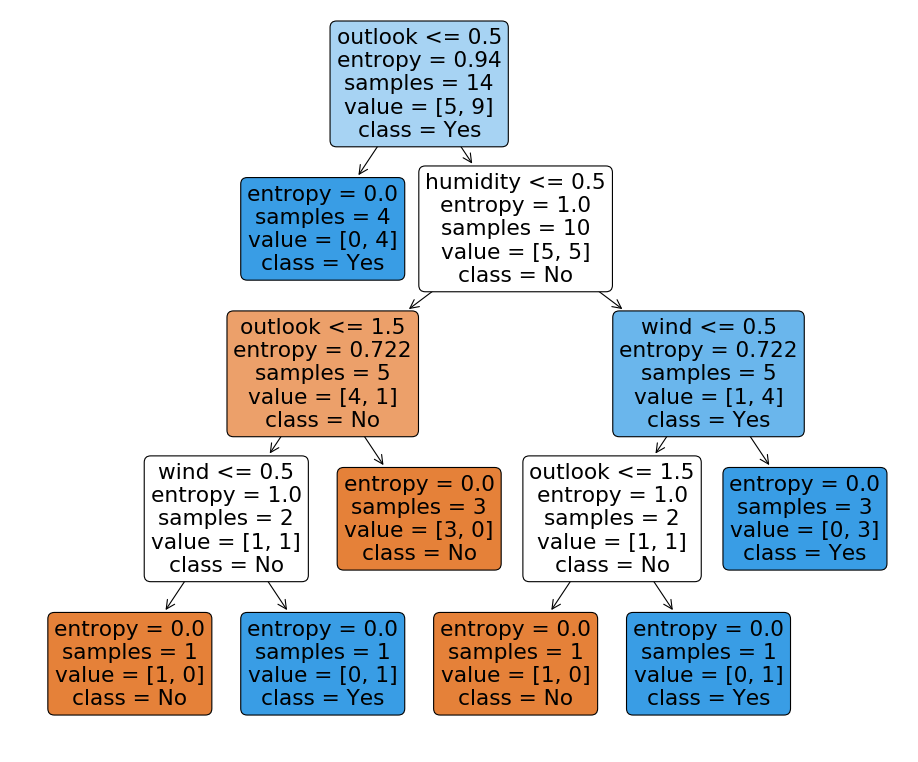

In [13]:
## Decision Tree Classifier
dtl_playtennis = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
dtl_playtennis = dtl_playtennis.fit(playtennis_data, playtennis_target)

### Membuat feature_names(kolom atribut) dan target_names(kolom target)
playtennis_feature_names = pd.array(playtennis_data.columns)
playtennis_target_names = pd.array(["No","Yes"])

### Menampilkan model pohon dengan export_text
print(tree.export_text(dtl_playtennis, feature_names=playtennis_feature_names))

### Menampilkan model pohon dengan plot_tree
plt.figure(num=None, figsize=(14, 12), dpi=80, facecolor='w', edgecolor='k')
nodes = tree.plot_tree(dtl_playtennis, filled=True, rounded=True, class_names=playtennis_target_names, feature_names=playtennis_feature_names)
plt.show()

In [14]:
## Id3Estimator
id3_playtennis = Id3Estimator()
id3_playtennis = id3_iris.fit(playtennis_data, playtennis_target)

### Menampilkan model pohon dengan menggunakan export_text_id3
print(export_text_id3(id3_playtennis.tree_, feature_names=playtennis_feature_names))

### Export model pohon dengan export_graphviz sehingga menjadi file .dot
id3_playtennis_tree = export_graphviz(id3_playtennis.tree_, 'id3_tree.dot', playtennis_feature_names)

### Ubah file .dot menjadi .pdf dengan menggunakan graphviz
# dot -Tpdf id3_tree.dot -o tree.pdf


outlook <=0.50: Yes (4) 
outlook >0.50
|   humidity <=0.50
|   |   temp <=1.50: No (2) 
|   |   temp >1.50
|   |   |   wind <=0.50: No (1) 
|   |   |   wind >0.50: No (1/1) 
|   humidity >0.50
|   |   wind <=0.50
|   |   |   temp <=1.00: No (1) 
|   |   |   temp >1.00: Yes (1) 
|   |   wind >0.50: Yes (3) 



<img src="playtennis_id3.png">

### 2. Melakukan analisis persamaan dan perbedaan <i>library<i> dengan referensi

#### a. Penentuan Atribut Terbaik

Pembentukan pohon keputusan dilakukan dengan memilih atribut secara greedy untuk mendapatkan pohon yang paling mendekati fung 

##### a.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Pada ketiga algoritma, penentuan atribut terbaik dilakukan dengan cara yang sama: melakukan iterasi terhadap seluruh atribut yang masih tersedia, menghitung ekspektasi information gain, kemudian membagi data yang ada berdasarkan atribut yang memiliki ekspektasi information gain yang paling tinggi. Berikutnya, pelabelan dilaksanakan seperti pada poin B. Perbedaan dari ketiga algoritma ini adalah bagaimana cara menghitung ekspektasi information gain tersebut.  

##### a.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Pada algoritma ID3 referensi, perhitungan information gain didapatkan dari reduksi entropi sebagai berikut
\begin{equation*}
\mathit{Gain}  \left(   S , A   \right)  \equiv  \mathit{Entropy}   \left(  S  \right)  -  \sum _{ v \in  \mathit{Values}  \left(  A  \right)  }  \frac{ |  S_{v}  | }{ |  S  | } \mathit{Entropy}  \left(  S_{v}  \right)
\end{equation*}

Sementara itu, library ID3 tidak hanya mempertimbangkan information gain melainkan juga <b>gain ratio</b>. Ketika nilai gain ratio sangat kecil, barulah library ID3 hanya mempertimbangkan information gain. Teknik gain ratio ini memanfaatkan split information yang nilainya sensitif terhadap atribut yang banyak valuenya bernilai sama, seperti tanggal. split information dan gain ratio dinyatakan sebagai berikut
\begin{equation*}
\mathit{SplitInformation}  \left(   S , A   \right)  \equiv   -  \sum _{i=1}^{c} \frac{ |  S_{i}  | }{ |  S  | } \log _{2} \frac{ |  S_{i}  | }{ |  S  | }
\end{equation*}
\begin{equation*}
\mathit{GainRatio}  \left(   S , A   \right)  \equiv   \frac{ \mathit{Gain\left(S,A\right)} }{ \mathit{SplitInformation\left(S,A\right)} } 
\end{equation*}

DecisionTreeClassifier yang diimplementasikan pada scikit-learn dapat menggunakan berbagai cara berbeda untuk meghitung impurity. Beberapa cara yang disebut populer pada dokumentasinya adalah menggunakan rasio gini, entropi, atau misclassification 

#### b. Penanganan label dari cabang setiap nilai atribut
Setelah Classifier telah berhasil menentukan atribut terbaik, langkah selanjutnya dalah untuk menangani label yang diberi untuk setiap nilai dari atribut tersebut. Misal atribut terbaik adalah Weather, weather memiliki 3 nilai yaitu Sunny, Warm, dan Cold. Pada bagian ini akan dibahas mengenai cara algoritma menentukan label apa yang harus diberikan untuk setiap nilai atribut tersebut

##### b.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Baik id3 yang dijelaskan di buku Tom Mitchell maupun DecisionTreeClassifier pada kakas Scikit melakukan penanganan label dengan cara menjalankan suatu fungsi setelah melakukan split cabang pada suatu atribut yang akan memutuskan apakah cabang tersebut akan berujung pada terminal node atau akan dilakukan proses pada poin A lagi untuk atribut yang tersisa. Cara memberi label nilai target variabel pada terminal node yang menjadi perbedaan

##### b.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Pada Id3 dalam referensi, terdapat dua kondisi untuk menentukan label dari cabang atribut suatu atribut. Pertama adalah jika seluruh atribut lainnya sudah diambil sebagai node sebelumnya maka akan dibentuk terminal node dengan label berupa nilai target variabel dengan jumlah terbanyak. Kedua, apabila hanya terdapat satu nilai target variabel yang berhubungan dengan cabang atribut tersebut, maka label akan berupa nilai variabel tersebut.

Pada library id3 dan DecisionTreeClassifier, tidak dilakukan perhitungan secara eksplisit apakah hanya terdapat satu nilai target variabel yang berhubungan namun menggunakan perhitungan entropi dan mengecek apakah entropi sudah lebih kecil dari min_entropy_decrease

#### c. Penentuan label jika examples kosong di cabang tersebut
Setelah memilih suatu atribut yang terbaik, maka akan dicari atribut yang terbaik untuk nilai atribut tersebut. Pada bagian ini akan membahas bagaimana menentukan label jika examples untuk atribut tersebut kosong.

##### c.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Penanganan untuk labelling ketika example kosong di suatu cabang adalah dengan melihat nilai atribut target pada example yang ada.

Untuk Id3 referensi dan Id3 library, jika example kosong maka akan sebelum branch baru akan ditambahkan sebuah daun dengan label yaitu most common value pada label yang ada pada examples

##### c.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Dibandingkan dengan Id3 referensi dan Id3 library yang akan memberi label pada sebuah daun dengan most common value pada label yang ada pada examples, untuk DecisionTreeClassifier akan <strong>menghilangkan atribut</strong> tersebut pada pohon yang dibentuk 

#### d. Penanganan atribut kontinu

##### d.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3
Persamaan antara ID3 referensi dengan library ID3 adalah keduanya sama-sama tidak dapat menangani atribut bernilai kontinu, melainkan harus dilakukan preproses terlebih dahulu yang mengkodekan nilai-nilai kontinu menjadi nilai kategorikal. Kedua library di atas tidak memiliki kesamaan dengan DecisionTreeClassifier.

##### d.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3
Meskipun sama-sama memerlukan preproses, ID3 referensi dan library ID3 melakukannya dengan cara yang berbeda. Pada ID3 referensi dinyatakan pada buku Tom Mitchell halaman 73 bahwa preproses dapat dilakukan dengan menetapkan sebuah threshold c yang dapat membagi atribut kontinu ke kelas boolean atribut < c. Berikut merupakan contoh dengan temperatur pada masalah playtennis.

Temperature | 40  | 48  | 60  | 72  | 80  | 90  |
----------- | --- | --- | --- | --- | --- | --- |
PlayTennis  | No  | No  | Yes | Yes | Yes | No  |

Terdapat dua kandidat threshold, yaitu diantara 60 dan 72 serta diantara 80 dan 90. Antara kedua threshold ini dapat dipilih threshold mana yang paling baik dengan menggunakan ekspektasi information gain seperti yang telah dibahas pada poin A. Pembagian kelas dengan threshold ini menurut Fayyad and Irani (1993) dapat dikembangkan menjadi beberapa interval.

Sementara itu, library ID3 melakukan preproses dengan LabelEncoder yang diimplementasikan pada library scikit-learn. Proses pengkodean ini dilakukan dengan memberikan setiap nilai unik pada atribut dengan nilai kontinu sebuah label numerik dengan nilai 0, 1, 2, ... n-1, dimana n adalah jumlah nilai unik.

Perbedaan paling signifikan adalah antara DecisionTreeClassifier terhadap dua algoritma sebelumnya. DecisionTreeClassifier mengimplementasikan algoritma CART yang telah dimodifikasi dan hanya dapat menerima atribut numerik dan dapat menangani atribut bernilai kontinu pada implementasinya. 

#### e. Penanganan atribut dengan <i>missing values</i>
Salah satu permasalahan pada proses learning adalah adanya nilai-nilai atribut yang tidak terdifinisi atau "missing". Pada bagian ini akan dilakukan analisis bagaimana kedua algoritma menangani permasalahn tersebut

##### e.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Baik id3 yang dijelaskan di buku Tom Mitchell maupun DecisionTreeClassifier dan id3 berbentuk library melakukan penanganan missing values dengan melihat values lain yang terdapat pada dataset.

##### e.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3

DecisionTreeClassifier dan id3 hanya dapat menerima data yang tidak memiliki missing values sehingga perlu dilakukan tahap preprocessing untuk melakukan proses imputasi. Imputasi tersebut dapat dilakukan dengn berbagai cara salah satunya dengan menggunakan library sklearn.preprocessing.SimpleImputer yang dapat melakukan imputasi berdasarkan 4 strategi yaaitu rata-rata, modus, konstan, atau median.

Pada Id3 yang dijelaskan dalam buku Tom Mitchell, terdapat dua strategi untuk menangani missing values. Pertama adalah untuk mengassign nilai missing dengan nilai yang paling umum pada node yang sekarang sedang ditinjau. Kedua adalah dengan menghitung probabilitas nilai yang mungkin untuk atribut tersebut berdasarkan nilai-nilai yang ada


#### f. <i>Pruning</i> dan parameter <i>confidence</i>

##### f.1 Persamaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Digunakan untuk mengatasi permasalahan overfitting data. Dilakukan dengan meng-iterasi semua node yang ada pada tree, sehingga termasuk dalam metode prune post-pruned.

##### f.2 Perbedaan Id3 referensi, library DecisionTreeClassifier dan library Id3

Pada Id3 referensi, tidak dijelaskan secara spesifik bagaimana cara melakukan pruning, tetapi dijelaskan lebih lanjut di halaman 69 tentang <i>reduced error pruning</i> (sebenarnya masih ada satu lagi yaitu <i>rule-post pruning</i>, tetapi pruning ini digunakan pada C4.5 di mana merupakan versi <i>upgrade</i> dari ID3). <i>Reduced error pruning</i> melakukan pruning dengan cara menghilangkan suatu subtree yang ada pada node tersebut, menjadikannya leaf node dan di-<i>assign</i> dengan <i>most common classification</i> yang terkait dengan node tersebut. Node akan dihilangkan secara iteratif sampai pruning ini membahayakan(contoh : mengurangi akurasi dari pohon terhadap validation set)

Pada library DecisionTreeClassifier, pruning dilakukan dengan menggunakan <i><strong>Minimal Cost-Complexity Pruning</strong></i>. <i><strong>Minimal Cost-Complexity Pruning</strong></i> merupakan pruning yang memiliki parameter nilai <strong>alpha</strong> atau lebih dikenal sebagai complexity parameter yang akan digunakan untuk mendefinisikan <i>cost-complexity measure</i> dengan rumus = <img src="dtl_pruning.png"> Untuk mencari nilai dari cost complexity, digunakan rumus =<img src="dtl_pruning2.png"> Nilai dari cost complexity dari sebuah node dan branch-nya dapat bernilai sama bergantung pada nilai dari alpha. Oleh karena itu, didapatkan definisi dari alpha effective adalah sebagai berikut = <img src="dtl_pruning3.png"> Sebuah non-terminal node dengan nilai alpha effective terkecil akan di-prune. Proses ini akan berlangsung terus menerus sampai nilai minimal alpha effective dari tree ini lebih besar dibandingkan dengan alpha.

Pada library Id3, pruning dilakukan dengan terlebih dahulu membagi dua dataset, yaitu sebagai data test dan sebagai data training. Data training akan digunakan untuk membuat pohon, dan data test akan digunakan untuk melakukan validasi terhadap pohon yang telah dibentuk sebelumnya. Hasil validasi tersebut akan dimasukkan sebagai nilai prediksi untuk setiap nodenya. Setelah melakukan validasi, maka proses pruning akan dimulai, yaitu dengan melakukan iterasi terhadap semua nodenya, dan dibandingkan dengan nilai dari anak node tersebut. Ketika nilai error dari node tersebut lebih kecil dari nilai error anaknya, maka anak dari node tersebut akan di prune.